In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('train.csv')

# How big the data is?

In [3]:
df.shape

(891, 12)

# How does the data look like?

In [4]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.0,2,0,350026,14.1083,NaN,S
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C


# Information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Missing Values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Statistical value

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Correlation between features

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

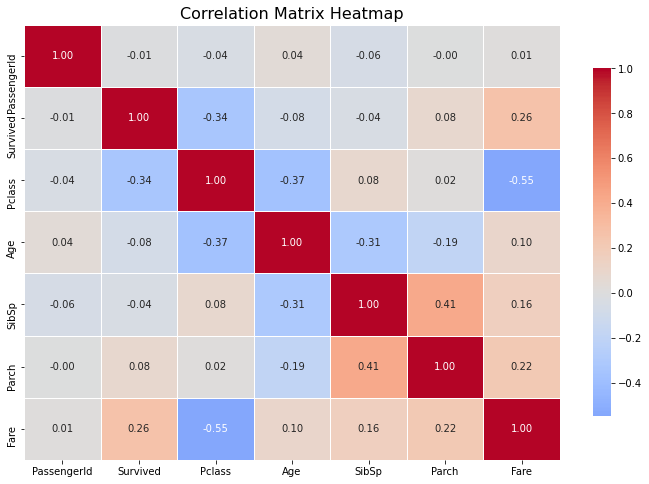

In [9]:
corr_matrix = df.corr()

# Set plot size
plt.figure(figsize=(12, 8))

# Create heatmap
sns.heatmap(
    corr_matrix,
    annot=True,        # Show correlation values
    fmt=".2f",         # Format values to 2 decimal places
    cmap="coolwarm",   # Color scheme
    center=0,          # Center colormap at 0
    linewidths=0.5,    # Lines between cells
    cbar_kws={"shrink": .8} # Color bar size
)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

# Categorical Data

# 1. countplot

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Embarked', ylabel='count'>

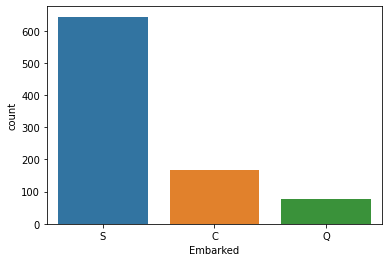

In [10]:
sns.countplot(df['Embarked'])

# 2. piechart

<Axes: ylabel='Sex'>

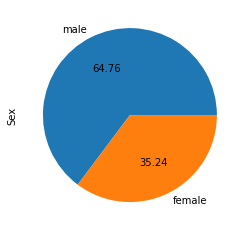

In [11]:
df['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

# Numerical Data

# 3. Histogram

Text(0, 0.5, 'Frequency')

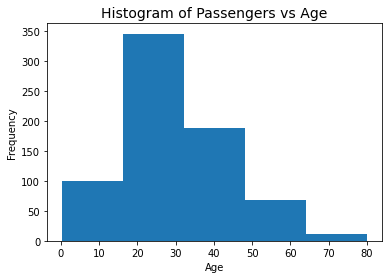

In [12]:
plt.hist(df['Age'],bins=5)
plt.title("Histogram of Passengers vs Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")

# handling missing values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [14]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Survived']),
                                                 df['Survived'],
                                                 test_size=0.2,
                                                random_state=42)

In [17]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [18]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [19]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
# Applying imputation

si_age = SimpleImputer(strategy="mean")
si_embarked = SimpleImputer(strategy='most_frequent')

X_train_age = si_age.fit_transform(X_train[['Age']])
X_train_embarked = si_embarked.fit_transform(X_train[['Embarked']])

X_test_age = si_age.transform(X_test[['Age']])
X_test_embarked = si_embarked.transform(X_test[['Embarked']])

In [21]:
X_train_embarked.shape

(712, 1)

In [22]:
X_test_embarked.shape

(179, 1)

In [23]:
# one hot encoding Sex and Embarked

ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train_sex = ohe_sex.fit_transform(X_train[['Sex']])
X_train_embarked = ohe_embarked.fit_transform(X_train_embarked)

X_test_sex = ohe_sex.transform(X_test[['Sex']])
X_test_embarked = ohe_embarked.transform(X_test_embarked)

In [24]:
X_train_embarked

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [25]:
import numpy as np

In [26]:
X_train_rem = X_train.drop(columns=['Sex','Age','Embarked'])
X_test_rem = X_test.drop(columns=['Sex','Age','Embarked'])

# make new dataset by concatenating encoded features
X_train_transformed = np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed = np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [27]:
X_test_transformed.shape

(179, 10)

In [28]:
X_train_transformed

array([[1., 0., 0., ..., 0., 0., 1.],
       [2., 0., 0., ..., 0., 0., 1.],
       [3., 0., 0., ..., 0., 0., 1.],
       ...,
       [3., 2., 0., ..., 0., 0., 1.],
       [1., 1., 2., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_transformed)


StandardScaler()

In [30]:
X_train_transformed_scaled = scaler.transform(X_train_transformed)
X_test_transformed_scaled = scaler.transform(X_test_transformed)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [32]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = SVC()

In [33]:
clf1.fit(X_train_transformed_scaled,y_train)
clf2.fit(X_train_transformed_scaled,y_train)
clf3.fit(X_train_transformed_scaled,y_train)

SVC()

In [34]:
y_pred1 = clf1.predict(X_test_transformed_scaled)
y_pred2 = clf2.predict(X_test_transformed_scaled)
y_pred3 = clf3.predict(X_test_transformed_scaled)

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))
print("Accuracy of SVC",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8100558659217877
Accuracy of Decision Trees 0.7877094972067039
Accuracy of SVC 0.7877094972067039


In [36]:
print("Logistic Regression Confusion Matrix\n")
confusion_matrix(y_test,y_pred1)
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,90,15
1,19,55


In [37]:
print("Decision Tree Confusion Matrix\n")
confusion_matrix(y_test,y_pred2)
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,87,18
1,20,54


In [38]:
print("SVC Confusion Matrix\n")
confusion_matrix(y_test,y_pred3)
pd.DataFrame(confusion_matrix(y_test,y_pred3),columns=list(range(0,2)))

SVC Confusion Matrix



,0,1
0,95,10
1,22,52


In [39]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [40]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred1))
print("Recall - ",recall_score(y_test,y_pred1))
print("F1 score - ",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  90  15
1  19  55
--------------------------------------------------
Precision -  0.7857142857142857
Recall -  0.7432432432432432
F1 score -  0.7638888888888888


In [41]:
print("For DT Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred2))
print("Recall - ",recall_score(y_test,y_pred2))
print("F1 score - ",f1_score(y_test,y_pred2))

For DT Model
--------------------------------------------------
    0   1
0  87  18
1  20  54
--------------------------------------------------
Precision -  0.75
Recall -  0.7297297297297297
F1 score -  0.7397260273972601


In [42]:
print("For SVC Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred3),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision - ",precision_score(y_test,y_pred3))
print("Recall - ",recall_score(y_test,y_pred3))
print("F1 score - ",f1_score(y_test,y_pred3))

For SVC Model
--------------------------------------------------
    0   1
0  95  10
1  22  52
--------------------------------------------------
Precision -  0.8387096774193549
Recall -  0.7027027027027027
F1 score -  0.7647058823529411


In [43]:
test_input = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [44]:
test_input

array([[2, 'male', 31.0, 0, 0, 10.5, 'S']], dtype=object)

In [45]:
test_input_sex = ohe_sex.transform(test_input[:,1].reshape(1,1))

In [46]:
test_input_sex

array([[0., 1.]])

In [47]:
test_input_embarked = ohe_embarked.transform(test_input[:,-1].reshape(1,1))

In [48]:
test_input_embarked

array([[0., 0., 1.]])

In [49]:
test_input_age = test_input[:,2].reshape(1,1)

In [50]:
test_input_transformed = np.concatenate((test_input[:,[0,3,4,5]],test_input_age,test_input_sex,test_input_embarked),axis=1)

In [51]:
test_input_transformed.shape

(1, 10)

In [52]:
prediction = clf1.predict(test_input_transformed)
print("prediction")

if (prediction[0] == 0):
  print('The person is not survived')
else:
  print('The person is survived')


prediction
The person is not survived
